In [ ]:
import jax.numpy as np
from jax import grad, jit, vmap
import tqdm

In [ ]:
def predict(params, inputs):
    return inputs @ params

def mse(params, inputs, targets):
    preds = predict(params, inputs)
    return np.mean((preds - targets)**2)

grad_fun = jit(grad(mse))  # compiled gradient evaluation function

In [3]:
import numpy as np
import matplotlib.pylab as plt

n, k = 10_000, 10
X = np.concatenate([np.ones((n, 1)), np.random.normal(0, 1, (n, k))], axis=1)
true_w = np.random.normal(0, 5, (k + 1,))
y = X @ true_w
np.random.seed(42)
W = np.random.normal(0, 1, (k + 1,))

stepsize = 0.02
n_step = 100
hist_gd = np.zeros((n_step,))
for i in tqdm.tqdm(range(n_step)):
    hist_gd[i] = mse(W, inputs=X, targets=y)
    dW = grad_fun(W, inputs=X, targets=y)
    W -= dW*stepsize

  0%|          | 0/100 [00:00<?, ?it/s]/Users/vincent/Development/calmcode.io/venv/lib/python3.7/site-packages/jax/lib/xla_bridge.py:123: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')
100%|██████████| 100/100 [00:00<00:00, 226.37it/s]


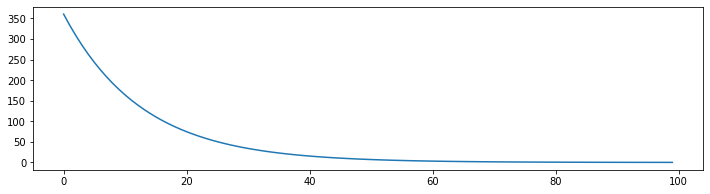

In [4]:
plt.figure(figsize=(12, 3))
plt.plot(hist_gd);

In [6]:
from jax import hessian

In [7]:
np.random.seed(42)
W = np.random.normal(0, 1, (k + 1,))

In [8]:
n_step = 3
hist_hess = np.zeros((n_step,))
for i in tqdm.tqdm(range(n_step)):
    hist_hess[i] = mse(W, inputs=X, targets=y)
    dW = np.linalg.inv(hessian(mse)(W, X, y)) @ grad_fun(W, inputs=X, targets=y)
    W -= dW

100%|██████████| 3/3 [00:01<00:00,  2.39it/s]


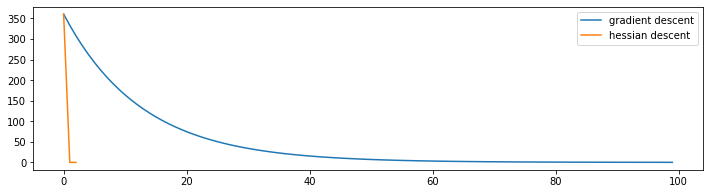

In [9]:
plt.figure(figsize=(12, 3))
plt.plot(hist_gd, label="gradient descent")
plt.plot(hist_hess, label="hessian descent")
plt.legend();